In [23]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv(r'./features.csv', sep='\t', encoding='utf-8')

In [25]:
df = df.dropna().drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [26]:
df.head(30)

,calories2hr,protein2hr,sugar2hr,carbs2hr,calories8hr,protein8hr,sugar8hr,carbs8hr,calories24hr,protein24hr,...,temp_q1g,temp_q3g,temp_skew,glucose,personalMean,personalStd,ID,HbA1c,Biological Sex,label
0,2693.0,191.9,149.0,189.9,4855.0,270.9,413.0,524.9,9575.0,667.9,...,31.66,35.415,-0.305264,61.0,96.889273,14.303804,1.0,5.5,FEMALE,PersLow
1,2693.0,191.9,149.0,189.9,4855.0,270.9,413.0,524.9,9575.0,667.9,...,31.66,35.415,-0.310748,59.0,97.006920,14.146553,1.0,5.5,FEMALE,PersLow
2,2693.0,191.9,149.0,189.9,4855.0,270.9,413.0,524.9,9575.0,667.9,...,31.66,35.415,-0.320072,58.0,97.131488,13.968094,1.0,5.5,FEMALE,PersLow
3,2693.0,191.9,149.0,189.9,4855.0,270.9,413.0,524.9,9575.0,667.9,...,31.66,35.415,-0.326616,59.0,97.259516,13.776431,1.0,5.5,FEMALE,PersLow
4,2693.0,191.9,149.0,189.9,4855.0,270.9,413.0,524.9,9575.0,667.9,...,31.66,35.445,-0.334181,63.0,97.384083,13.590791,1.0,5.5,FEMALE,PersLow
5,2693.0,191.9,149.0,189.9,4855.0,270.9,413.0,524.9,9575.0,667.9,...,31.66,35.500,-0.340893,67.0,97.484429,13.442287,1.0,5.5,FEMALE,PersLow
6,2693.0,191.9,149.0,189.9,4855.0,270.9,413.0,524.9,9575.0,667.9,...,31.66,35.535,-0.345253,68.0,97.557093,13.333243,1.0,5.5,FEMALE,PersLow
7,2693.0,191.9,149.0,189.9,4855.0,270.9,413.0,524.9,9575.0,667.9,...,31.66,35.550,-0.346920,63.0,97.612457,13.243001,1.0,5.5,FEMALE,PersLow
8,2237.0,175.9,66.0,104.9,3487.0,222.9,164.0,269.9,5927.0,539.9,...,31.66,35.550,-0.347584,59.0,97.688581,13.105869,1.0,5.5,FEMALE,PersLow
9,2237.0,175.9,66.0,104.9,3487.0,222.9,164.0,269.9,5927.0,539.9,...,31.66,35.550,-0.346719,60.0,97.792388,12.915799,1.0,5.5,FEMALE,PersLow


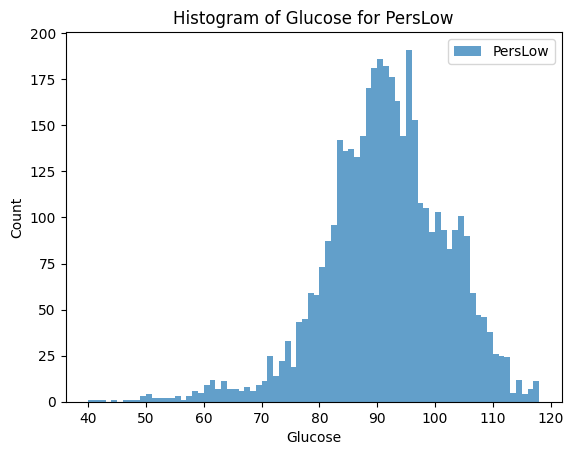

In [27]:
# 데이터프레임에서 특정 클래스 선택
df_perslow = df[df['label'] == 'PersLow']

# Bin width 설정
bin_width = 1

# 데이터의 최소값과 최대값을 기반으로 bin의 경계값 계산
min_value = df_perslow['glucose'].min()
max_value = df_perslow['glucose'].max()
bins = np.arange(min_value, max_value + bin_width, bin_width)

# 히스토그램 그리기
plt.hist(df_perslow['glucose'], bins=bins, alpha=0.7, label='PersLow')

# 그래프 제목 및 라벨 설정
plt.title('Histogram of Glucose for PersLow')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()
plt.show()

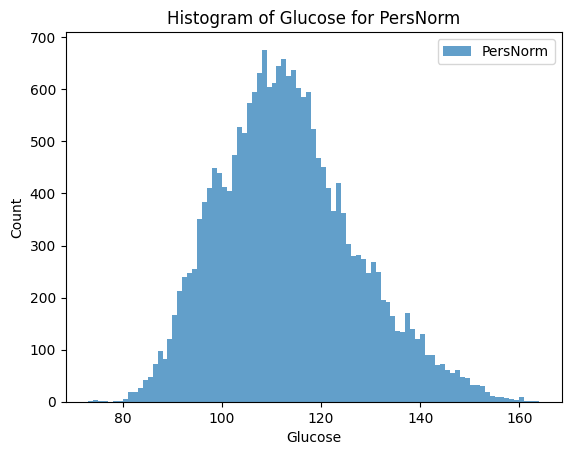

In [28]:
# 데이터프레임에서 특정 클래스 선택
df_persnorm = df[df['label'] == 'PersNorm']

# Bin width 설정
bin_width = 1

# 데이터의 최소값과 최대값을 기반으로 bin의 경계값 계산
min_value = df_persnorm['glucose'].min()
max_value = df_persnorm['glucose'].max()
bins = np.arange(min_value, max_value + bin_width, bin_width)

# 히스토그램 그리기
plt.hist(df_persnorm['glucose'], bins=bins, alpha=0.7, label='PersNorm')

# 그래프 제목 및 라벨 설정
plt.title('Histogram of Glucose for PersNorm')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()
plt.show()

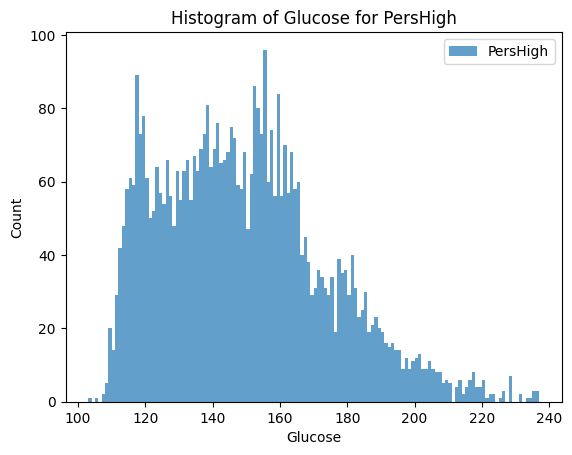

In [29]:
# 데이터프레임에서 특정 클래스 선택
df_pershigh = df[df['label'] == 'PersHigh']

# Bin width 설정
bin_width = 1

# 데이터의 최소값과 최대값을 기반으로 bin의 경계값 계산
min_value = df_pershigh['glucose'].min()
max_value = df_pershigh['glucose'].max()
bins = np.arange(min_value, max_value + bin_width, bin_width)

# 히스토그램 그리기
plt.hist(df_pershigh['glucose'], bins=bins, alpha=0.7, label='PersHigh')

# 그래프 제목 및 라벨 설정
plt.title('Histogram of Glucose for PersHigh')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()
plt.show()